## Special thanks to https://github.com/masudakoji whose work is adapted here

For visualizing we need: 

S(j,c), to print each "set_id" with a color code

M(h), for mapping intervl "h" to its start time and duration

and finally we need: X(c,d,h)=(course, day, hour(=interval_id)).



## loading S,M,X:

In [33]:
import pandas as pd
import os
import numpy as np
import json
BASE_DIR = os.path.abspath('')
INPUT_ADD = "data_02.xlsx"
dataset_name = "data_02"
json_name = "data_02.json"




In [34]:
parameter_s_data = pd.read_excel(
     io = os.path.join(BASE_DIR, INPUT_ADD),
     sheet_name = 'S',
     engine='openpyxl'
)
j_indices = parameter_s_data['j'].tolist()
c_indices = parameter_s_data['c'].tolist()
course_set = zip(c_indices,j_indices)

course_to_set = {}
for c , s in course_set:
    if c in course_to_set.keys():
        course_to_set[c].append(s)
    else:
        course_to_set[c] = []
        course_to_set[c].append(s)
        
    

In [35]:
course_to_set

{1: [1],
 2: [1, 2],
 8: [1, 4],
 9: [1],
 18: [1, 2],
 3: [2, 3],
 10: [2],
 11: [2],
 4: [3],
 5: [3, 5],
 12: [3, 5],
 13: [3, 5],
 14: [3, 5],
 7: [4],
 16: [4],
 17: [4, 5],
 15: [5],
 19: [6],
 20: [6],
 21: [6]}

In [36]:
# loading M
intervals_mapping = pd.read_excel(
     io = os.path.join(BASE_DIR, INPUT_ADD),
     sheet_name = 'M',
     engine='openpyxl'
)
#h_room = intervals_mapping['room'].tolist()
h_start_hour = intervals_mapping['start_hour'].tolist()
h_start_min = intervals_mapping['start_min'].tolist()
h_duration = intervals_mapping['duration'].tolist()


In [37]:
# loading X
variables_results = json.load(open(os.path.join(BASE_DIR, json_name)))
x = [[int(key.split('\'')[1]),int(key.split('\'')[3]),int(key.split('\'')[5])]
     for key, val in variables_results['x'].items() if val==1]

## Exporting txt files for each day

In [38]:
def course_num_handler(c,course_to_set):
    if c[0] not in course_to_set.keys():
        return c[0]
    
    n = len(str(c[0]))
    zeros =  "00"
    for i in range(n):
        zeros += "0"
    sets_list = course_to_set[c[0]] 
    tmp = ''
    for i in sets_list:
        tmp += str(i)
    tmp += zeros
    course_number = int(tmp) + c[0]
    return course_number
    
def set_id_handler(c,course_to_set):
    if c[0] not in course_to_set.keys():
            return 0 
    return course_to_set[c[0]][0]

def realtime_room_allocation(day_i_courses):
    # allocated_rooms = {course_id: room_number} 
    allocated_rooms = {}
    
    # Assumed we have 9 intervals at most
    #exclusive_intervals_set1 = [1,2,3,4]
    #exclusive_intervals_set1 = [5,6,7,8,9]
    # Assumed we have only 2 rooms available
    
    allocated_intervals = []
    correspond_course_id = []
    for c in day_i_courses:
        if c[2] in allocated_intervals:
            allocation_number = 2
            c_id = allocated_rooms
            if allocated_rooms[correspond_course_id[allocated_intervals.index(c[2])]]==2:
                allocation_number = 1
            
            allocated_rooms[c[0]] = allocation_number
        else:
            allocated_intervals.append(c[2])
            correspond_course_id.append(c[0])
            preferd_num = 1
            if c[2] >4:
                preferd_num = 2
            allocated_rooms[c[0]] = preferd_num
            
    return allocated_rooms
    
    

In [39]:
# we use "set_id" as a color code
# Assumed we have 1 to 5 working days

input_files_names = []
for day in range(1,6):
    # lists:information of courses that will be dumpped in .txt
    # lists=[Room_number,Start_hour,Start_minute,duration,course_number,set_id]
    lists = [] 
    day_i_courses = [course for course in x if course[1]==day]
    c_room = realtime_room_allocation(day_i_courses)
    for c in day_i_courses:
        course_number = course_num_handler(c,course_to_set)
        set_id = set_id_handler(c,course_to_set)
        lists.append([ c_room[c[0]],
                       h_start_hour[c[2]-1],
                       h_start_min[c[2]-1],
                       h_duration[c[2]-1],
                       course_number,
                       set_id  ])
    
    file_name = dataset_name + '_day_'+ str(day)  +'.txt'
    input_files_names.append(file_name)
    textfile = open(file_name, "w")
    for lst in lists:
        for element in lst:
            textfile.write(str(element) + "\t")
        textfile.write( "\n")
    textfile.close()
    

## visualization part

In [40]:

def lable_handler(dataset_name):
    #assumed we have only
    prefix = dataset_name + '_'
    days = ['day_1','day_2','day_3','day_4','day_5']
    for i in range(len(days)):
        days[i] = prefix + days[i]
    return days
        
    

C:\Users\Lenovo\miniconda3\envs\gmsjupyter\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


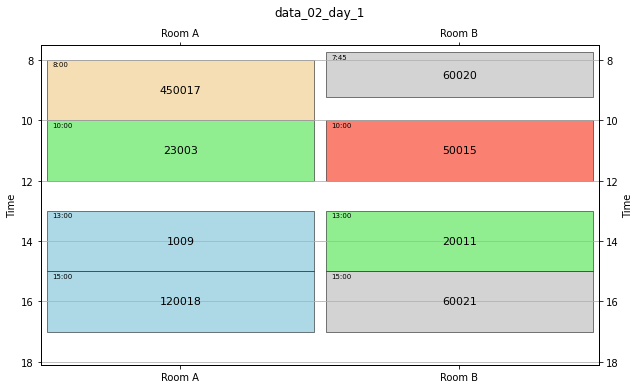

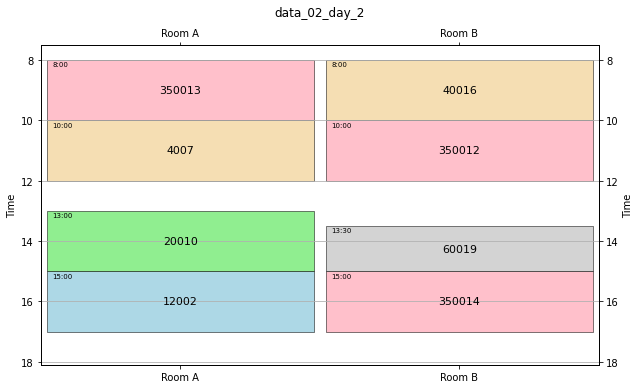

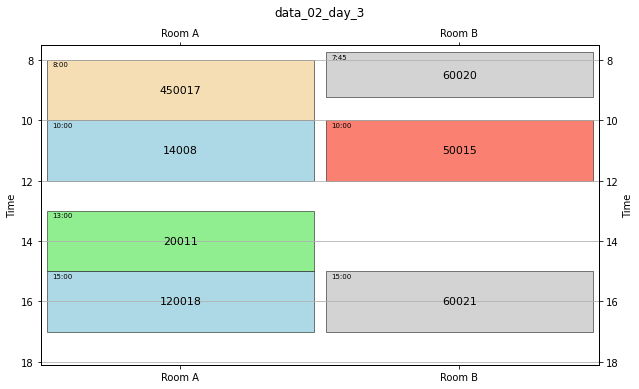

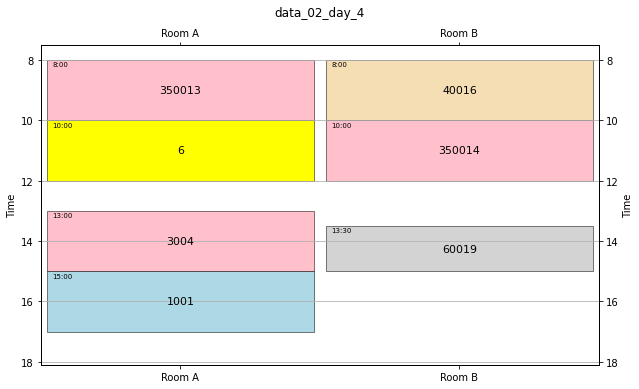

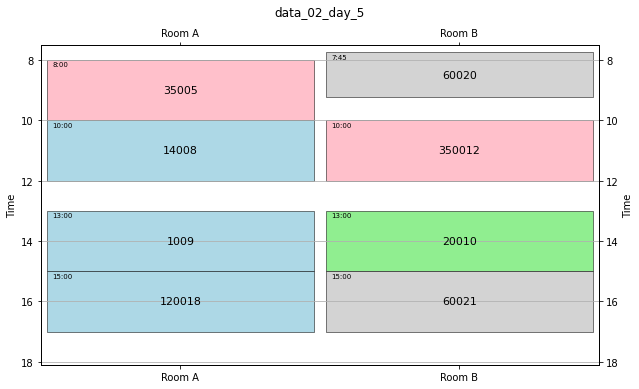

In [41]:
#!usr/bin/env python
#coding: utf-8
# Asummed we have only two rooms
# Assumed we have only 5 days 

import matplotlib.pyplot as plt

rooms=['Room A','Room B']
colors=['yellow','lightblue','lightgreen','pink', 'wheat', 'salmon','lightgray']
 
input_files=input_files_names
day_labels = lable_handler(dataset_name)
 
for input_file, day_label in zip(input_files, day_labels):
     fig=plt.figure(figsize=(10,5.89))
     for line in open(input_file, 'r'):
         data=line.split()
         # Dev note: you can remove data_copy and optimize this code later!
         data_copy = [d for d in data]
         #print(f"data is {data}")
         event=data[-2]
         #print(f'event is {event}')
         data=list(map(float, data[:-2]))
         #print(f'mapped data is {data}')
         room=data[0]-0.48
         start=data[1]+data[2]/60
         end=start+data[3]/60
         # plot event
         plt.fill_between([room, room+0.96], [start, start], [end,end], color=colors[int(data_copy[5])], edgecolor='k', linewidth=0.5)
         # plot beginning time
         plt.text(room+0.02, start+0.05 ,'{0}:{1:0>2}'.format(int(data[1]),int(data[2])), va='top', fontsize=7)
         # plot event name
         plt.text(room+0.48, (start+end)*0.5, event, ha='center', va='center', fontsize=11)
 
     # Set Axis
     ax=fig.add_subplot(111)
     ax.yaxis.grid()
     ax.set_xlim(0.5,len(rooms)+0.5)
     # Assumption: our time intervals lies in [7.45 AM , 17 PM]    
     ax.set_ylim(18.1, 7.5)
     ax.set_xticks(range(1,len(rooms)+1))
     ax.set_xticklabels(rooms)
     ax.set_ylabel('Time')
 
     # Set Second Axis
     ax2=ax.twiny().twinx()
     ax2.set_xlim(ax.get_xlim())
     ax2.set_ylim(ax.get_ylim())
     ax2.set_xticks(ax.get_xticks())
     ax2.set_xticklabels(rooms)
     ax2.set_ylabel('Time')
 
 
     plt.title(day_label,y=1.07)
     plt.savefig('{0}.png'.format(day_label), dpi=200)

# removing useless txt files
for file in input_files_names:
   os.remove(file) 